In [1]:
import pandas as pd
from datetime import datetime
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn import metrics
import pickle

In [2]:
df=pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.shape

(76014, 15)

In [4]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [6]:
#Categorical Columns
cat_columns=df.select_dtypes(include='object')
cat_columns.head()

,date,venue,bat_team,bowl_team,batsman,bowler
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


In [7]:
#Numerical Columns
num_columns=df.select_dtypes(exclude='object')
num_columns.head()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,1,0,0.1,1,0,0,0,222
1,1,1,0,0.2,1,0,0,0,222
2,1,2,0,0.2,2,0,0,0,222
3,1,2,0,0.3,2,0,0,0,222
4,1,2,0,0.4,2,0,0,0,222


In [8]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [10]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [11]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'],drop_first=True)

In [13]:
encoded_df.head()

,mid,date,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,1,2008-04-18,M Chinnaswamy Stadium,BB McCullum,Z Khan,61,0,5.1,59,0,...,0,0,0,0,0,0,0,0,1,0
33,1,2008-04-18,M Chinnaswamy Stadium,SC Ganguly,Z Khan,61,1,5.2,59,1,...,0,0,0,0,0,0,0,0,1,0
34,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.3,59,1,...,0,0,0,0,0,0,0,0,1,0
35,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.4,59,1,...,0,0,0,0,0,0,0,0,1,0
36,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.5,58,1,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# Dropping Unwanted Features
encoded_df.drop(['mid','striker','non-striker','batsman','bowler','venue'],axis=1,inplace=True)

In [15]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Train Test Split

In [16]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [17]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [18]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

### Feature Importance

In [19]:
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
print(model.feature_importances_)

[0.23039993 0.20348965 0.0791008  0.22268639 0.03678186 0.01534873
 0.01776257 0.01517322 0.01966244 0.01592531 0.01843401 0.01136355
 0.01557123 0.0169391  0.01578441 0.01777128 0.01813583 0.01653197
 0.01313774]


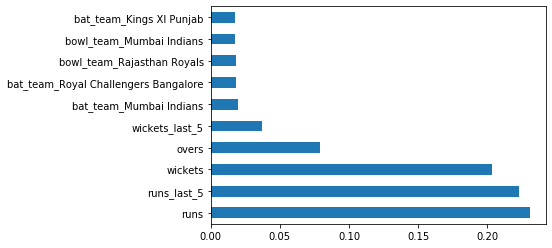

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Model Selection

In [21]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.3337998354874


In [22]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4544674.617665381, tolerance: 2529.955696594561
  positive)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4463024.247711871, tolerance: 2547.0380710286604
  positive)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4637247.446214822, tolerance: 2667.8126904366463
  positive)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

{'alpha': 1}
-320.82214916809124


### Model Evaluation For Ridge Regression

In [23]:
prediction=ridge_regressor.predict(X_test)

<IPython.core.display.Javascript object>

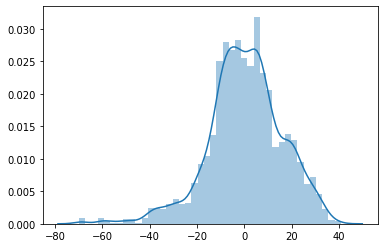

In [24]:
sns.distplot(y_test-prediction)

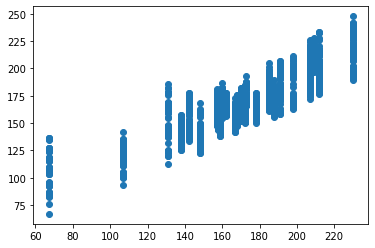

In [25]:
plt.scatter(y_test,prediction)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117033644975825
MSE: 251.01092125039258


<IPython.core.display.Javascript object>

RMSE: 15.843324185611825


### Model Evaluation For Lasso Regression

In [27]:
predictions=lasso_regressor.predict(X_test)

<IPython.core.display.Javascript object>

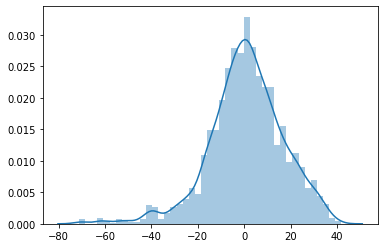

In [28]:
sns.distplot(y_test-predictions)

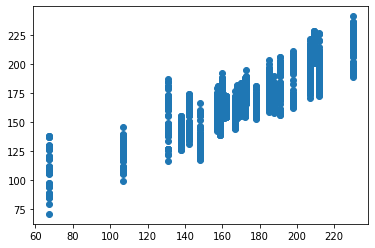

In [29]:
plt.scatter(y_test,predictions)

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12.213583996827493
MSE: 262.36538279606964


<IPython.core.display.Javascript object>

RMSE: 16.19769683615759


In [31]:
# open a file, where you ant to store the data
file = open('ridge_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(ridge_regressor, file)